## Machine Learning Project 1:   Heart Disease Prediction using Machine Learning Algorithms ❤️‍🩹🩺🏥

* This task is to predict coronary heart disease (CHD) in males from a high-risk region in the Western Cape, South Africa. CHD presence is represented as a binary outcome (1 for presence, 0 for absence) based on nine features.

* There ten nine  variables on this dataset: 

  **One Label (Target Variable)**: *chd*: 0=No, 1=Yes

  **Nine Features**:
1. Sbp: Systolic Blood Pressure
2. Yobacco: Cumulative Tobacco consumption in kg
3. ldl: Low-Density Lipoprotein Cholesterol
4. Adiposity
5. Famhist: Family History of Heart Disease (binary: present/absent)
6. Typea: Type-A Behavior
7. Obesity
8. Alcohol: Current Alcohol Consumption
9. Age


# Analysis Content 

Part 1: Explatory Data Analysis (EDA)
1. Data Preprocessing 
2. Visualisations and Feature Analysis
3. Feature Engineering 

Part 2: Logistic Regressor with Ridge Penalty
1. Data Preprocessing 
2. Model & Prediction
3. Model Evaluation 
5. Model Validation: 10- Fold Cross Valiedation and HyperTunning 
6. Prediction for a New Observation

Part 3: Exploring Other Classifiers and Choosing the Best One 
1. KNN 
2. Decision Tree with CART
3. Random Forest
4. Naive Bayesian
5. SVM (Support Vector Machine) 
6. GradientBoost 

# Part 1: Explatory Data Analysis (EDA)

* In this part, our objective is to understand the distribution, variability, and relationships between variables.

# 1.1 Data Preprocessing 

In [1]:
# Importing Libraries
# that will be used in this notebook

import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

C:\Users\melis\AppData\Local\Temp\ipykernel_14308\1070918077.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Data Loading 
#Read the dataset
df = pd.read_csv("heart-disease.csv")

#Top 5 values
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1

In [3]:
#Last 5 values 
df.tail()

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
457  214      0.4   5.98      31.72   Absent     64    28.45     0.00   58   
458  182      4.2   4.41      32.10   Absent     52    28.61    18.72   52   
459  108      3.0   1.59      15.23   Absent     40    20.09    26.64   55   
460  118      5.4  11.61      30.79   Absent     64    27.35    23.97   40   
461  132      0.0   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
457    0  
458    1  
459    0  
460    0  
461    1

In [4]:
# Dataset structure information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [5]:
# Row-column
df.shape

(462, 10)

In [6]:
#Check missing values 
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [7]:
#Numerical Data

# Convert 'famhist' to a numerical variable: 1 for 'Present', 0 for 'Absent'
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

# Check the first few rows of the dataframe to ensure the conversion
print(df.head())



   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49    1


In [8]:
#Descriptive statistics 

#Generate summarises for each numerical feature to understand the central tendencies and spread 

df.describe().T

count        mean        std     min       25%      50%       75%  \
sbp        462.0  138.326840  20.496317  101.00  124.0000  134.000  148.0000   
tobacco    462.0    3.635649   4.593024    0.00    0.0525    2.000    5.5000   
ldl        462.0    4.740325   2.070909    0.98    3.2825    4.340    5.7900   
adiposity  462.0   25.406732   7.780699    6.74   19.7750   26.115   31.2275   
famhist    462.0    0.415584   0.493357    0.00    0.0000    0.000    1.0000   
typea      462.0   53.103896   9.817534   13.00   47.0000   53.000   60.0000   
obesity    462.0   26.044113   4.213680   14.70   22.9850   25.805   28.4975   
alcohol    462.0   17.044394  24.481059    0.00    0.5100    7.510   23.8925   
age        462.0   42.816017  14.608956   15.00   31.0000   45.000   55.0000   
chd        462.0    0.346320   0.476313    0.00    0.0000    0.000    1.0000   

              max  
sbp        218.00  
tobacco     31.20  
ldl         15.33  
adiposity   42.49  
famhist      1.00  
typea       78.00  
obesity     46.58  
alcohol    147.19  
age         64.00  
chd          1.00

# 1.2  Visualisations and Feature Analysis

1.2.1  Analysis of Target Variable 

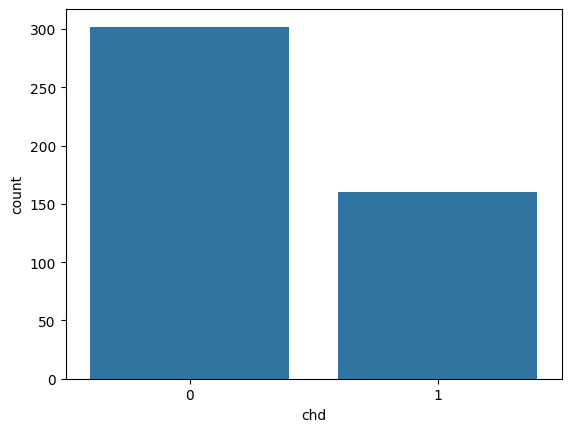

In [9]:
#Analysis of target variable
df["chd"].value_counts()
sns.countplot(x="chd", data=df)
plt.show()

In [10]:
# Ratio of chd 
100* df["chd"].value_counts()/ len(df)

chd
0    65.367965
1    34.632035
Name: count, dtype: float64

1.2.2 Categorical variables 

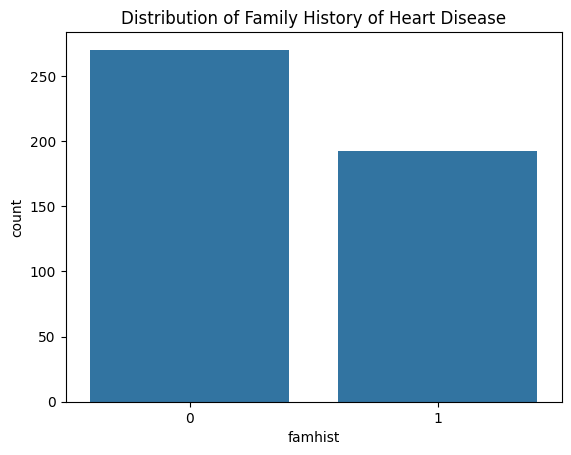

In [11]:
# For 'famhist'
sns.countplot(x='famhist', data=df)
plt.title('Distribution of Family History of Heart Disease')
plt.show()

In [12]:
# Ratio of famhist
print(df['famhist'].value_counts())
print(df['famhist'].value_counts(normalize=True) * 100)  # Percentage

famhist
0    270
1    192
Name: count, dtype: int64
famhist
0    58.441558
1    41.558442
Name: proportion, dtype: float64


In [13]:
# Creating and Analysing Cross-Tabulation of Family History and Coronary Heart Disease (CHD)

cross_tab = pd.crosstab(df['famhist'], df['chd'], margins=True)  # Including the total
print(cross_tab)

# Proportional cross-tab for easier interpretation
prop_cross_tab = pd.crosstab(df['famhist'], df['chd'], normalize='index')  # Row-wise normalization
print(prop_cross_tab)


chd        0    1  All
famhist               
0        206   64  270
1         96   96  192
All      302  160  462
chd             0         1
famhist                    
0        0.762963  0.237037
1        0.500000  0.500000


1.2.3 Numerical Variables

**Using Histograms and Box Plots for Exploring Numerical Variables**

1. Histogram:
* A histogram displays the frequency distribution of a given numerical variable by showing how many observations fall into specified intervals from smallest to largest.

2. Box Plot:
* A box plot illustrates the distribution of a numerical variable, providing insights into the spread and skewness of the data.

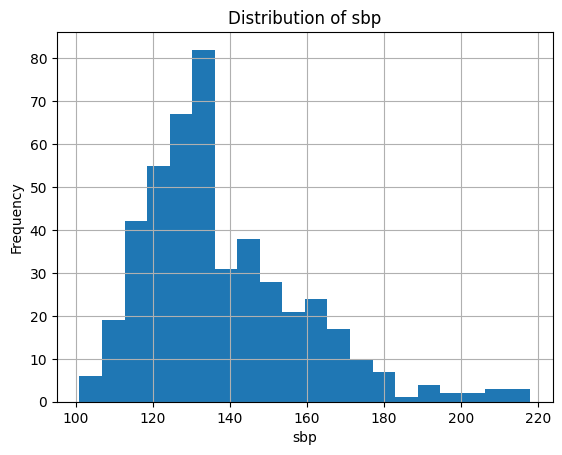

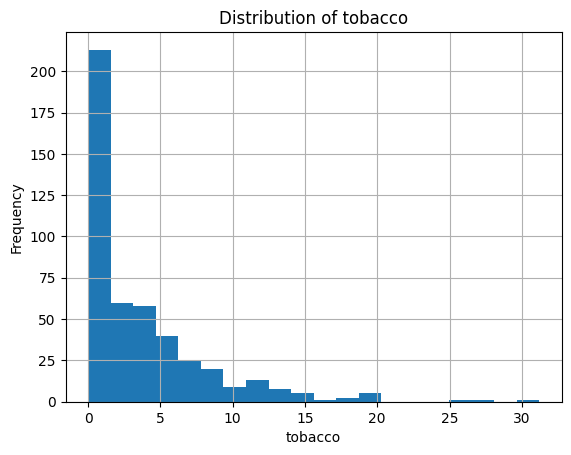

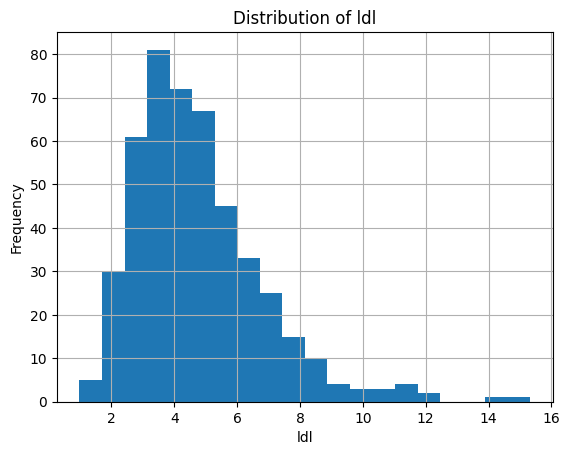

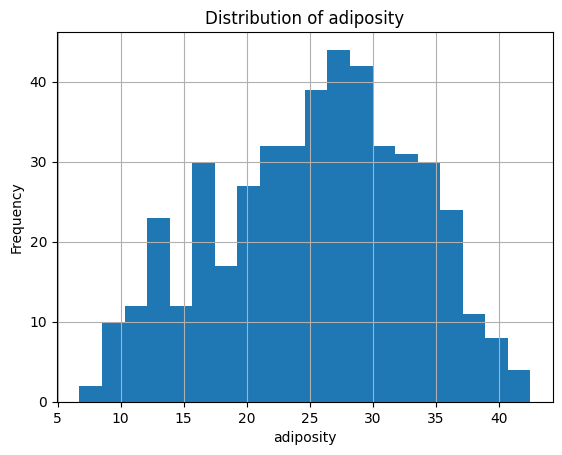

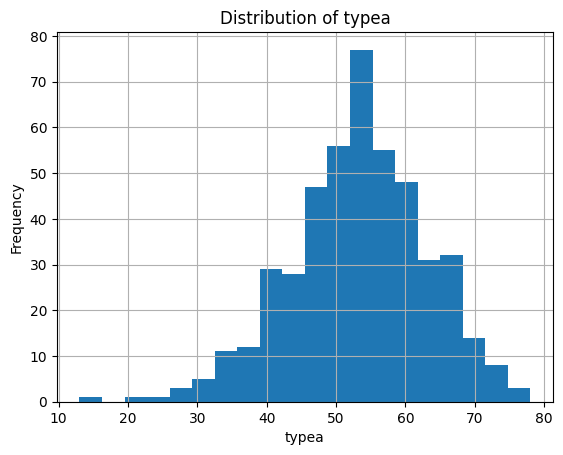

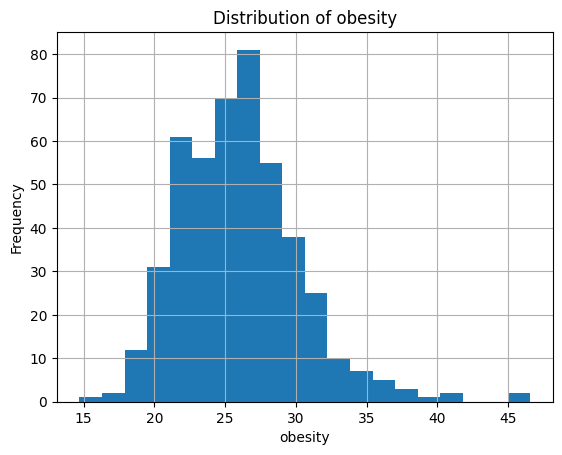

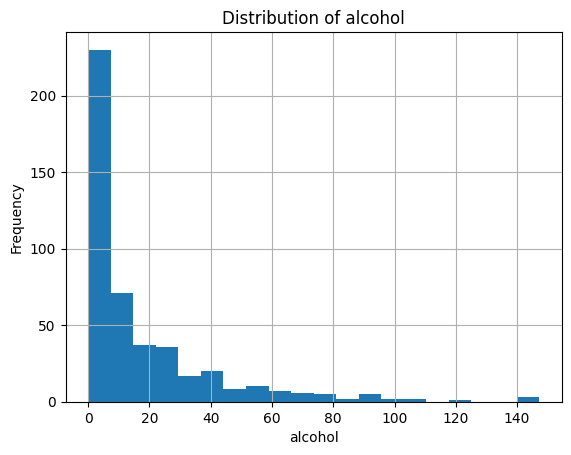

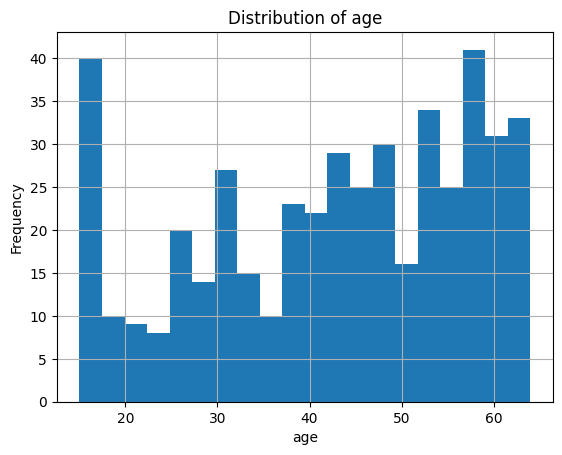

In [14]:
# Distribution of Numerical Variables 

import matplotlib.pyplot as plt

def plot_numerical_col(dataframe, numerical_col):
    """Plots a histogram for a numerical column in the dataframe."""
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {numerical_col}')
    plt.show(block=True)

# List of columns to exclude from plotting
exclude_columns = ['chd', 'famhist']

# List of numerical columns excluding specific columns
numerical_cols = [col for col in df.columns if col not in exclude_columns]

# Loop over the filtered columns and plot histograms
for col in numerical_cols:
    plot_numerical_col(df, col)


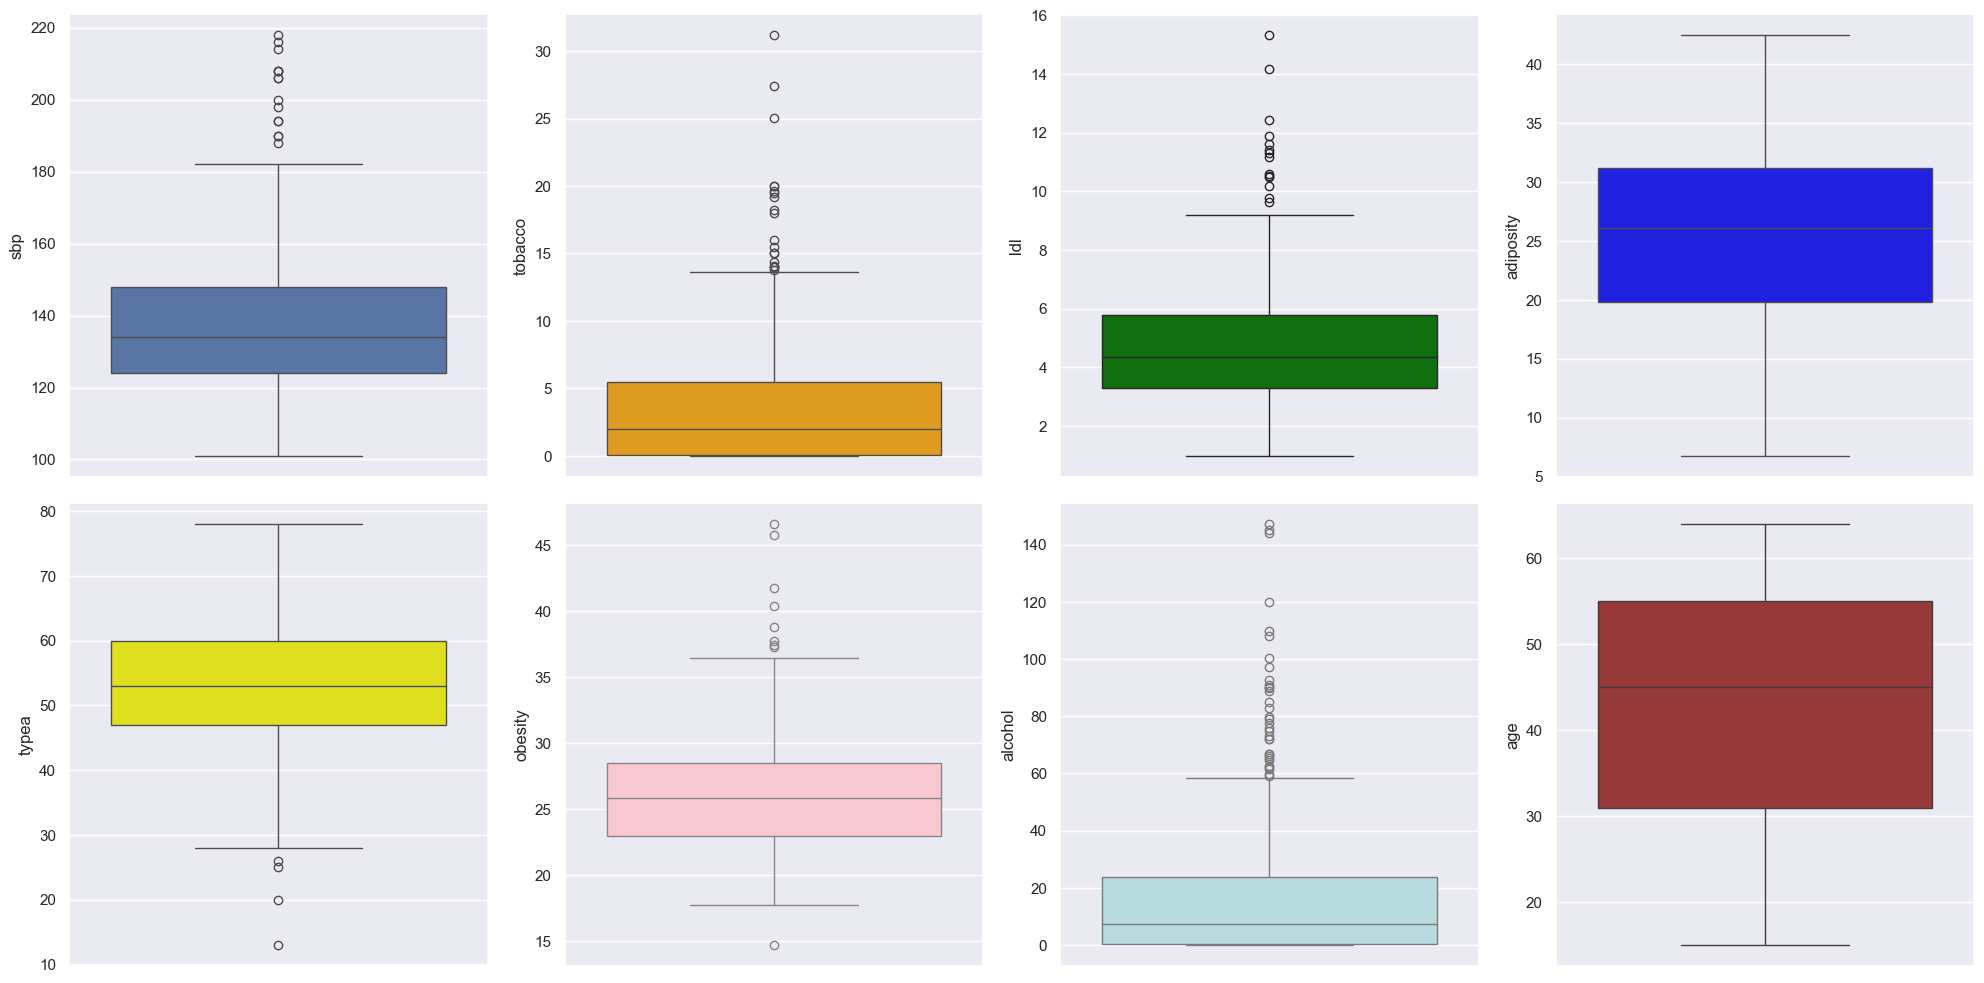

In [15]:
#Boxplot for numerical data

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  

sns.boxplot(data=df, y='sbp', ax=axs[0, 0])
axs[0, 0].set_ylabel('sbp')

sns.boxplot(data=df, y='tobacco', ax=axs[0, 1], color='orange')
axs[0, 1].set_ylabel('tobacco')

sns.boxplot(data=df, y='ldl', ax=axs[0, 2], color='green')
axs[0, 2].set_ylabel('ldl')

sns.boxplot(data=df, y='adiposity', ax=axs[0, 3], color='blue')
axs[0, 3].set_ylabel('adiposity')

sns.boxplot(data=df, y='typea', ax=axs[1, 0], color='yellow')
axs[1, 0].set_ylabel('typea')

sns.boxplot(data=df, y='obesity', ax=axs[1, 1], color='pink')
axs[1, 1].set_ylabel('obesity')

sns.boxplot(data=df, y='alcohol', ax=axs[1, 2], color='powderblue')
axs[1, 2].set_ylabel('alcohol')

sns.boxplot(data=df, y='age', ax=axs[1, 3], color='brown')
axs[1, 3].set_ylabel('age')

plt.tight_layout() 
plt.show()


1.2.4 Target Variable versus All  Variables

In [16]:
#Target Variable versus All Features 

def target_summary_with_num(dataframe, target, numerical_col):
    """Prints the mean of a numerical column grouped by the target column."""
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# List of columns to exclude from the summary
exclude_columns = ['chd', 'famhist_numerical']

# List of numerical columns excluding specific columns for summary
cols = [col for col in df.columns if col not in exclude_columns and df[col].dtype != 'O']

# Loop over the filtered columns and print the target summary
for col in cols:
    target_summary_with_num(df, "chd", col)


            sbp
chd            
0    135.460265
1    143.737500


      tobacco
chd          
0    2.634735
1    5.524875


          ldl
chd          
0    4.344238
1    5.487938


     adiposity
chd           
0    23.969106
1    28.120250


      famhist
chd          
0    0.317881
1    0.600000


        typea
chd          
0    52.36755
1    54.49375


       obesity
chd           
0    25.737450
1    26.622937


       alcohol
chd           
0    15.931358
1    19.145250


           age
chd           
0    38.854305
1    50.293750




1.2.5 Correlation Matrix 

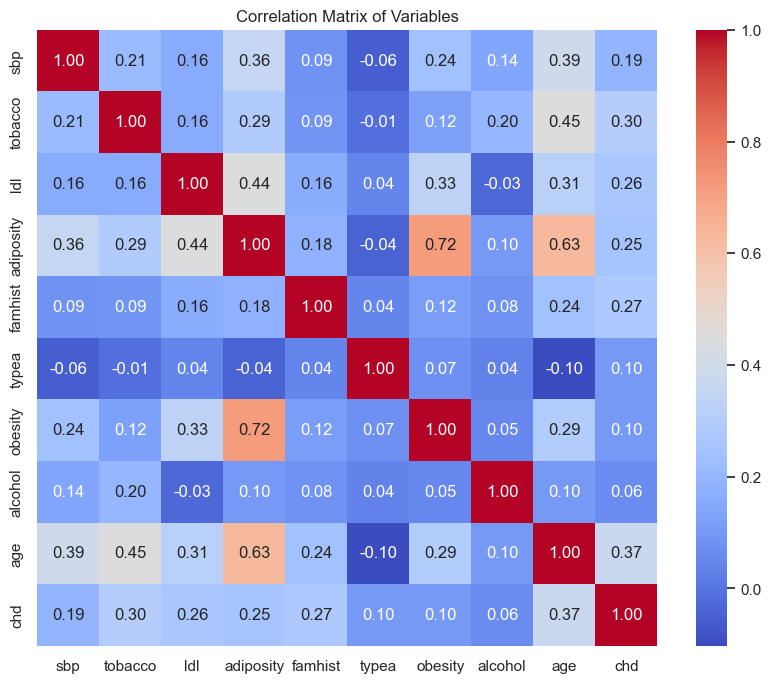

In [17]:
%matplotlib inline

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical data
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

**Correlation Heatmap Insights**

Analyzing a correlation matrix is essential for understanding the interrelationships among variables, pivotal for data analysis, feature selection, and predictive modeling. This matrix visually represents the correlation coefficients between variable pairs in our dataset. Key insights from our correlation matrix include:

* Adiposity and obesity exhibit a strong positive correlation (0.72), highlighted by the darkest red shade outside the diagonal. This suggests that an increase in adiposity is typically accompanied by an increase in obesity levels.
There is also a significant positive correlation between adiposity and age (0.63), indicating that adiposity tends to increase with age.

* Age and tobacco use display a moderately strong positive correlation (0.45), suggesting that tobacco usage may be more prevalent among older individuals.

* Several variables demonstrate negligible correlations, as shown by the shades of blue near zero. For example, there is minimal correlation between LDL and alcohol (-0.03), and between Type A behavior and adiposity (-0.04).


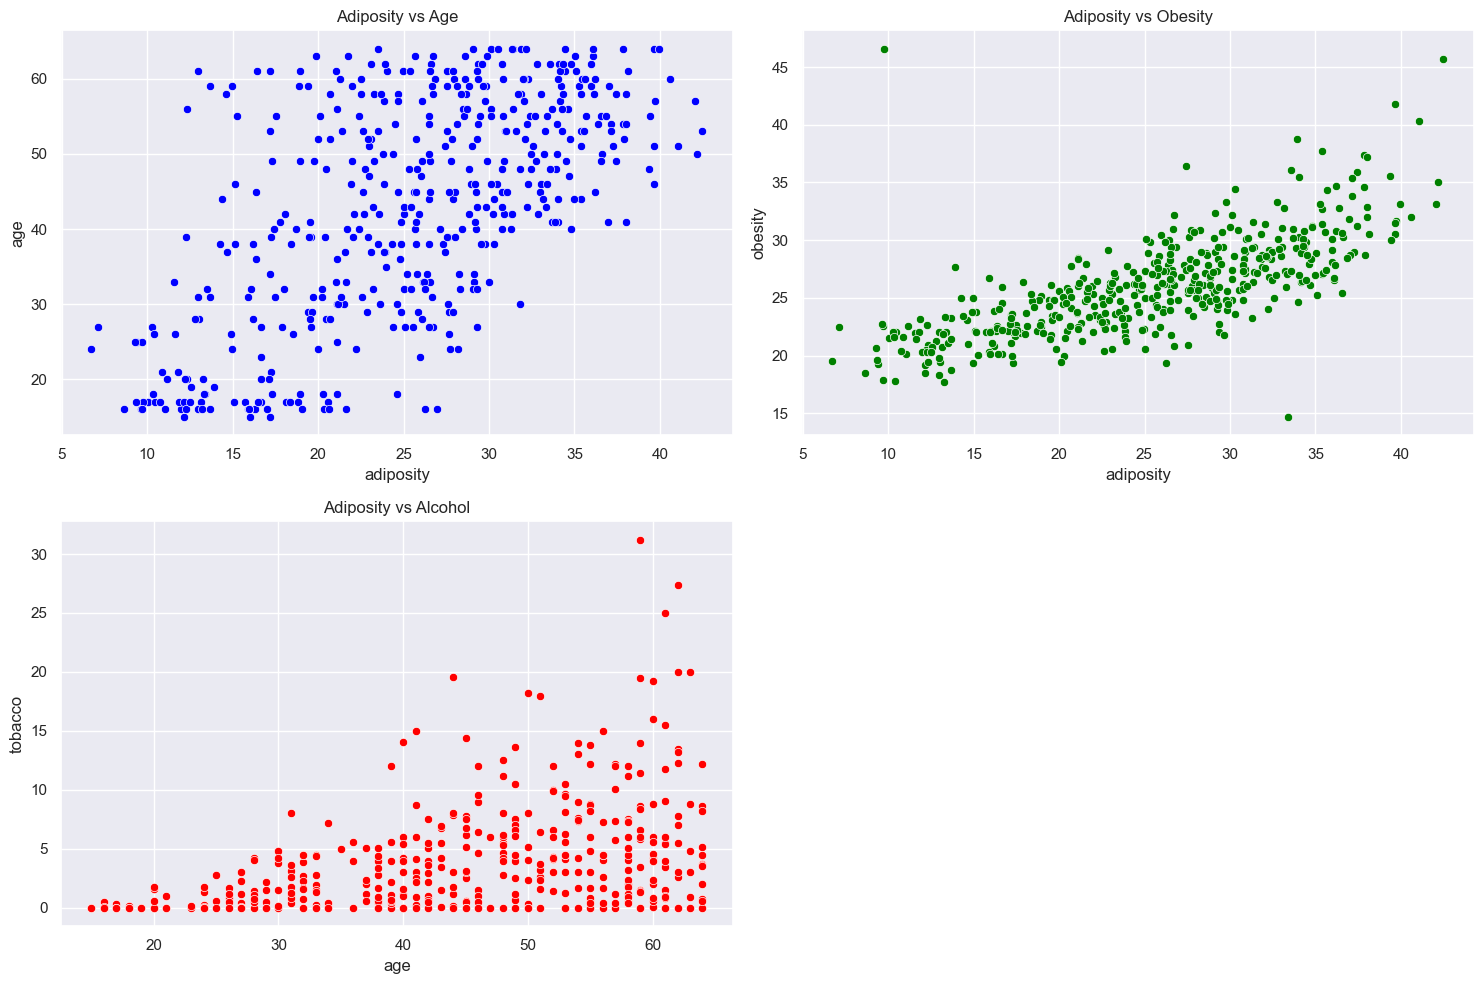

In [18]:
# After the correlation matrix, plotting scatter plots 
# for pairs of variables to explore their relationships further

plt.figure(figsize=(15, 10))  

# Adiposity vs Age
plt.subplot(2, 2, 1)  # First plot
sns.scatterplot(x='adiposity', y='age', data=df, color='blue')
plt.title('Adiposity vs Age')

# Adiposity vs Obesity
plt.subplot(2, 2, 2)  # Second plot
sns.scatterplot(x='adiposity', y='obesity', data=df, color='green')
plt.title('Adiposity vs Obesity')

# Age vs Tobacco
plt.subplot(2, 2, 3)  # Third plot
sns.scatterplot(x='age', y='tobacco', data=df, color='red')
plt.title('Adiposity vs Alcohol')

plt.tight_layout()
plt.show()

3. Feature Engineering 

3.1 Checking Missing Values 

In [19]:
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

* There is no missing values.
* All features are of the same type.

3.2 Outlier Observation Analysis

In [20]:
#Outlier Observation Analysis

numeric_list = ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    """
    Calculates the outlier thresholds for a specific column.
 
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    """
    Checks if there are any outliers in a specific column.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]

def replace_with_thresholds(dataframe, col_name):
    """
    Replaces outliers in a column with the outlier thresholds.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
    dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit

# Creating a list of columns excluding 'chd', 'famhist_numerical'
cols = [col for col in df.columns if col in numeric_list]

# Identifying and processing outliers
for col in cols:
    outliers = check_outlier(df, col)
    print(f"{col} has {len(outliers)} outliers")
    replace_with_thresholds(df, col)


sbp has 0 outliers
tobacco has 0 outliers
ldl has 0 outliers
adiposity has 0 outliers
typea has 0 outliers
obesity has 0 outliers
alcohol has 0 outliers
age has 0 outliers


* I have completed the  outlier analysis and ensured that there were no outliers. This indicates that our dataset is  clean. The absence of outliers can contribute positively to our model training process, as outliers can have a negative impact on model performance.

In [21]:
# Scaling with RobustScaler 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[cols] = scaler.fit_transform(df[cols])

## Part 2: Logistic Regression with Ridge Penalty

* In this section, the focus is on utilizing logistic regression with a ridge penalty to classify patients as either CHD-positive or CHD-negative. The objective is to build a model that can accurately predict the likelihood of individuals developing coronary heart disease based on their specific characteristics.


In [22]:
#Step 1: Data Preparation  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('chd', axis=1)
y = df[['chd']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
#Step 2: Model Building and Fitting 

from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with L2 penalty
# Note: Smaller values of C specify stronger regularization
logreg_ridge = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

# Fit the model on the scaled training data
logreg_ridge.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42, solver='liblinear')

* solver='liblinear' specifies the algorithm used for optimization. 'liblinear' is a good choice for small datasets and binary classification.

Accuracy: 0.74
Precision: 0.66
Recall: 0.55
F1 Score: 0.60
ROC-AUC Score: 0.80
Confusion Matrix:
[[76 14]
 [22 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        90
           1       0.66      0.55      0.60        49

    accuracy                           0.74       139
   macro avg       0.72      0.70      0.70       139
weighted avg       0.73      0.74      0.74       139

Log Loss: 0.5083


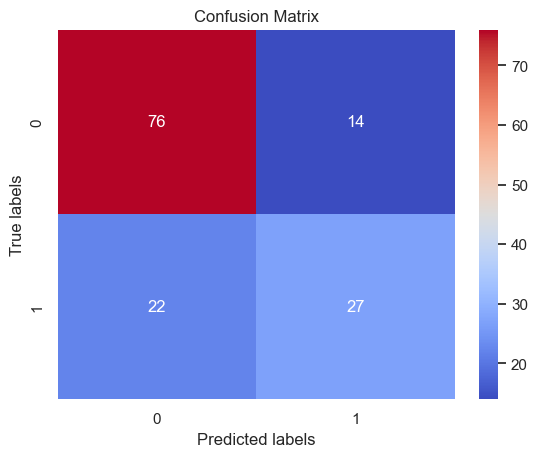

In [24]:
# Step 3: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = logreg_ridge.predict(X_test_scaled)
y_pred_proba = logreg_ridge.predict_proba(X_test_scaled)[:,1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

from sklearn.metrics import log_loss
log_loss_value = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {log_loss_value:.4f}")

# Manual Confusion Matrix Plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Key Performance Metrics for Classification Models

* Accuracy: Derived from dividing the number of correct predictions by the total number of predictions. It measures how often the classification model is able to make the correct prediction.
* Precision: How successful are we in our predictions when we predict a 1 
* Recall: Measures how many of the total positive classes we correctly predicted.
* F1 Score: The harmonic mean of Precision and Recall


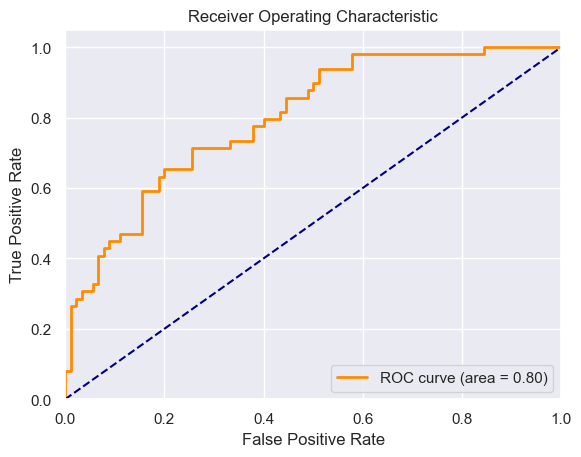

In [25]:
#ROC and AUC

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ROC-AUC Score (80%) highlights the model’s good discriminatory ability between the CHD positive and negative cases.


In [26]:
#Step 4: Model Validation 
#4.1 10-Fold Cross- Validation
from sklearn.model_selection import cross_validate

# Define scoring metrics for evaluation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform 10-fold cross-validation
cv_results = cross_validate(logreg_ridge, X, y, cv=10, scoring=scoring)

# Display average scores
for score in scoring:
    print(f"Average test {score}:", cv_results[f'test_{score}'].mean())


Average test accuracy: 0.7250693802035153
Average test precision: 0.6246175393234217
Average test recall: 0.50625
Average test f1: 0.5525174784647402
Average test roc_auc: 0.7729166666666666


4.1 10-Fold Cross-Validation:

* Purpose: To evaluate the generalizability and robustness of the logistic regression model. This method divides the dataset into ten distinct folds (or segments), then trains the model on nine folds and tests it on the remaining one. This process is repeated ten times, with each fold serving as the test set once.

* Why: It helps in understanding how the model performs on different subsets of the dataset, reducing the impact of the partition's randomness on model performance. It provides a more stable and reliable estimate of the model’s ability to generalize to unseen data compared to a single train-test split.

In [27]:
#Step 4: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear', random_state=42), 
                           param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Display best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 0.1}
Best cross-validation score: 0.7274519230769231


In [28]:
#Finding best parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.7274519230769231


4.2 Hyperparameter Tuning with GridSearchCV:

* Purpose: To find the best set of hyperparameters (in this case, the regularization strength 'C' and type of solver) for the logistic regression model. Hyperparameters are not learned directly from the data and need to be set before training the model.

* Why: Different hyperparameter values can lead to different model performance. GridSearchCV systematically explores a range of possible hyperparameter values, performs cross-validation for each combination, and identifies the combination that produces the best results based on a specified scoring metric (here, 'accuracy').


In [29]:
# Apply 
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        90
           1       0.64      0.51      0.57        49

    accuracy                           0.73       139
   macro avg       0.70      0.68      0.68       139
weighted avg       0.72      0.73      0.72       139



It's important to note that while performance on a test set is crucial, the goal of practices like hyperparameter tuning and cross-validation is to build a model that generalizes well to new, unseen data.  

The "Best Model" demonstrates better performance in identifying the negative class (0) with a precision of 0.76 and a recall of 0.84, resulting in a balanced F1-score of 0.80, indicating strong ability to identify non-cases correctly. For the positive class (1), the model shows lower effectiveness with a precision of 0.64 and a recall of 0.51, leading to a lower F1-score of 0.57, which suggests that the model struggles more with correctly identifying actual cases. Overall, the model achieves an accuracy of 0.74, indicating that it correctly predicts the status (CHD present or absent) for approximately 73% of the individuals in the test set.


In [30]:
#Model Coefficients and Intercept 
print("Intercept:", logreg_ridge.intercept_)
print("Coefficients:", logreg_ridge.coef_)

Intercept: [-0.8607747]
Coefficients: [[ 0.19569403  0.27777013  0.41754378  0.19339188  0.36367854  0.35949123
  -0.2634047   0.02193324  0.59344898]]


* Given the intercept and coefficients we've provided the equation for our  logistic regression model can be written as follows:


LogOdds(CHD) = − 0.8607747 + 0.19569403 × sbp + 0.27777013 × tobacco + 0.41754378 ×
ldl + 0.19339188 × adiposity + 0.36367854 × famhist + 0.35949123 × typea −0.2634047 × obesity + 0.02193324 × alcohol +0.59344898 × age


* The coefficients indicate the effect of each variable on the log-odds of CHD. For example, the coefficient for age is 0.59344898, which indicates that the likelihood of CHD increases with age. Positive coefficients represent an increase, while negative coefficients represent a decrease.
* Family History (famhist): This categorical variable is encoded as 'Present' and 'Absent', and it has a significant coefficient (0.36367854), indicating that family history significantly impacts the risk of CHD.
* Other Significant Effects: Variables such as tobacco and LDL (cholesterol level) have also been identified as factors that increase the risk of CHD.

The results indicate that this logistic regression model with ridge penalty has achieved a good balance between accuracy, precision, recall, and F1 score. The ROC-AUC score of 0.80 is particularly strong, indicating a high level of separability between the positive and negative classes. 

In [31]:
# Step 6: Prediction 
y_pred = logreg_ridge.predict(X)
y_pred[0:10] # first ten predictions 

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [32]:
from sklearn.linear_model import LogisticRegression

#  X is our features dataset
random_user = X.sample(1, random_state=45)

# Make a prediction for the random user
predicted_chd = logreg_ridge.predict(random_user)

# Output the prediction
print("Predicted CHD status:", predicted_chd[0])

Predicted CHD status: 0


In [33]:
# Save the optimised accuracy result for LR
lr_optimized_acc = 0.74

## 3. Exploring Other Classifiers and Choosing the Best One 

* In this section on exploring other classifiers, the aim is to identify a classifier that surpasses the accuracy of logistic regression with a ridge penalty in predicting coronary heart disease (CHD) risk in males from a high-risk region in the Western Cape of South Africa. The goal is to develop a predictive model that effectively determines the probability of individuals developing CHD based on their distinctive attributes.


Here are the classifiers and its steps we will be following:

1. KNN 
2. Decision Tree with CART
3. Random Forest
4. Naive Bayesian
5. SVM (Support Vector Machine) 
6. GradientBoost 

3.1 KNN (K-Nearest Neighbours Classification)

* All relevant and irrelevant changes of Ridge regression KNN can be recommended to eliminate the disadvantage of leaving it in the model

Best parameters: {'knn__n_neighbors': 7}
Best cross-validation score (accuracy): 0.7316017316017316
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       148
           1       0.64      0.39      0.48        83

    accuracy                           0.70       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231

AUC Score: 0.6690817323347444
Cross-validation results:
Average Accuracy: 0.6471785383903793
Average F1 Score: 0.40432710960796514
Average ROC AUC Score: 0.6898185483870968


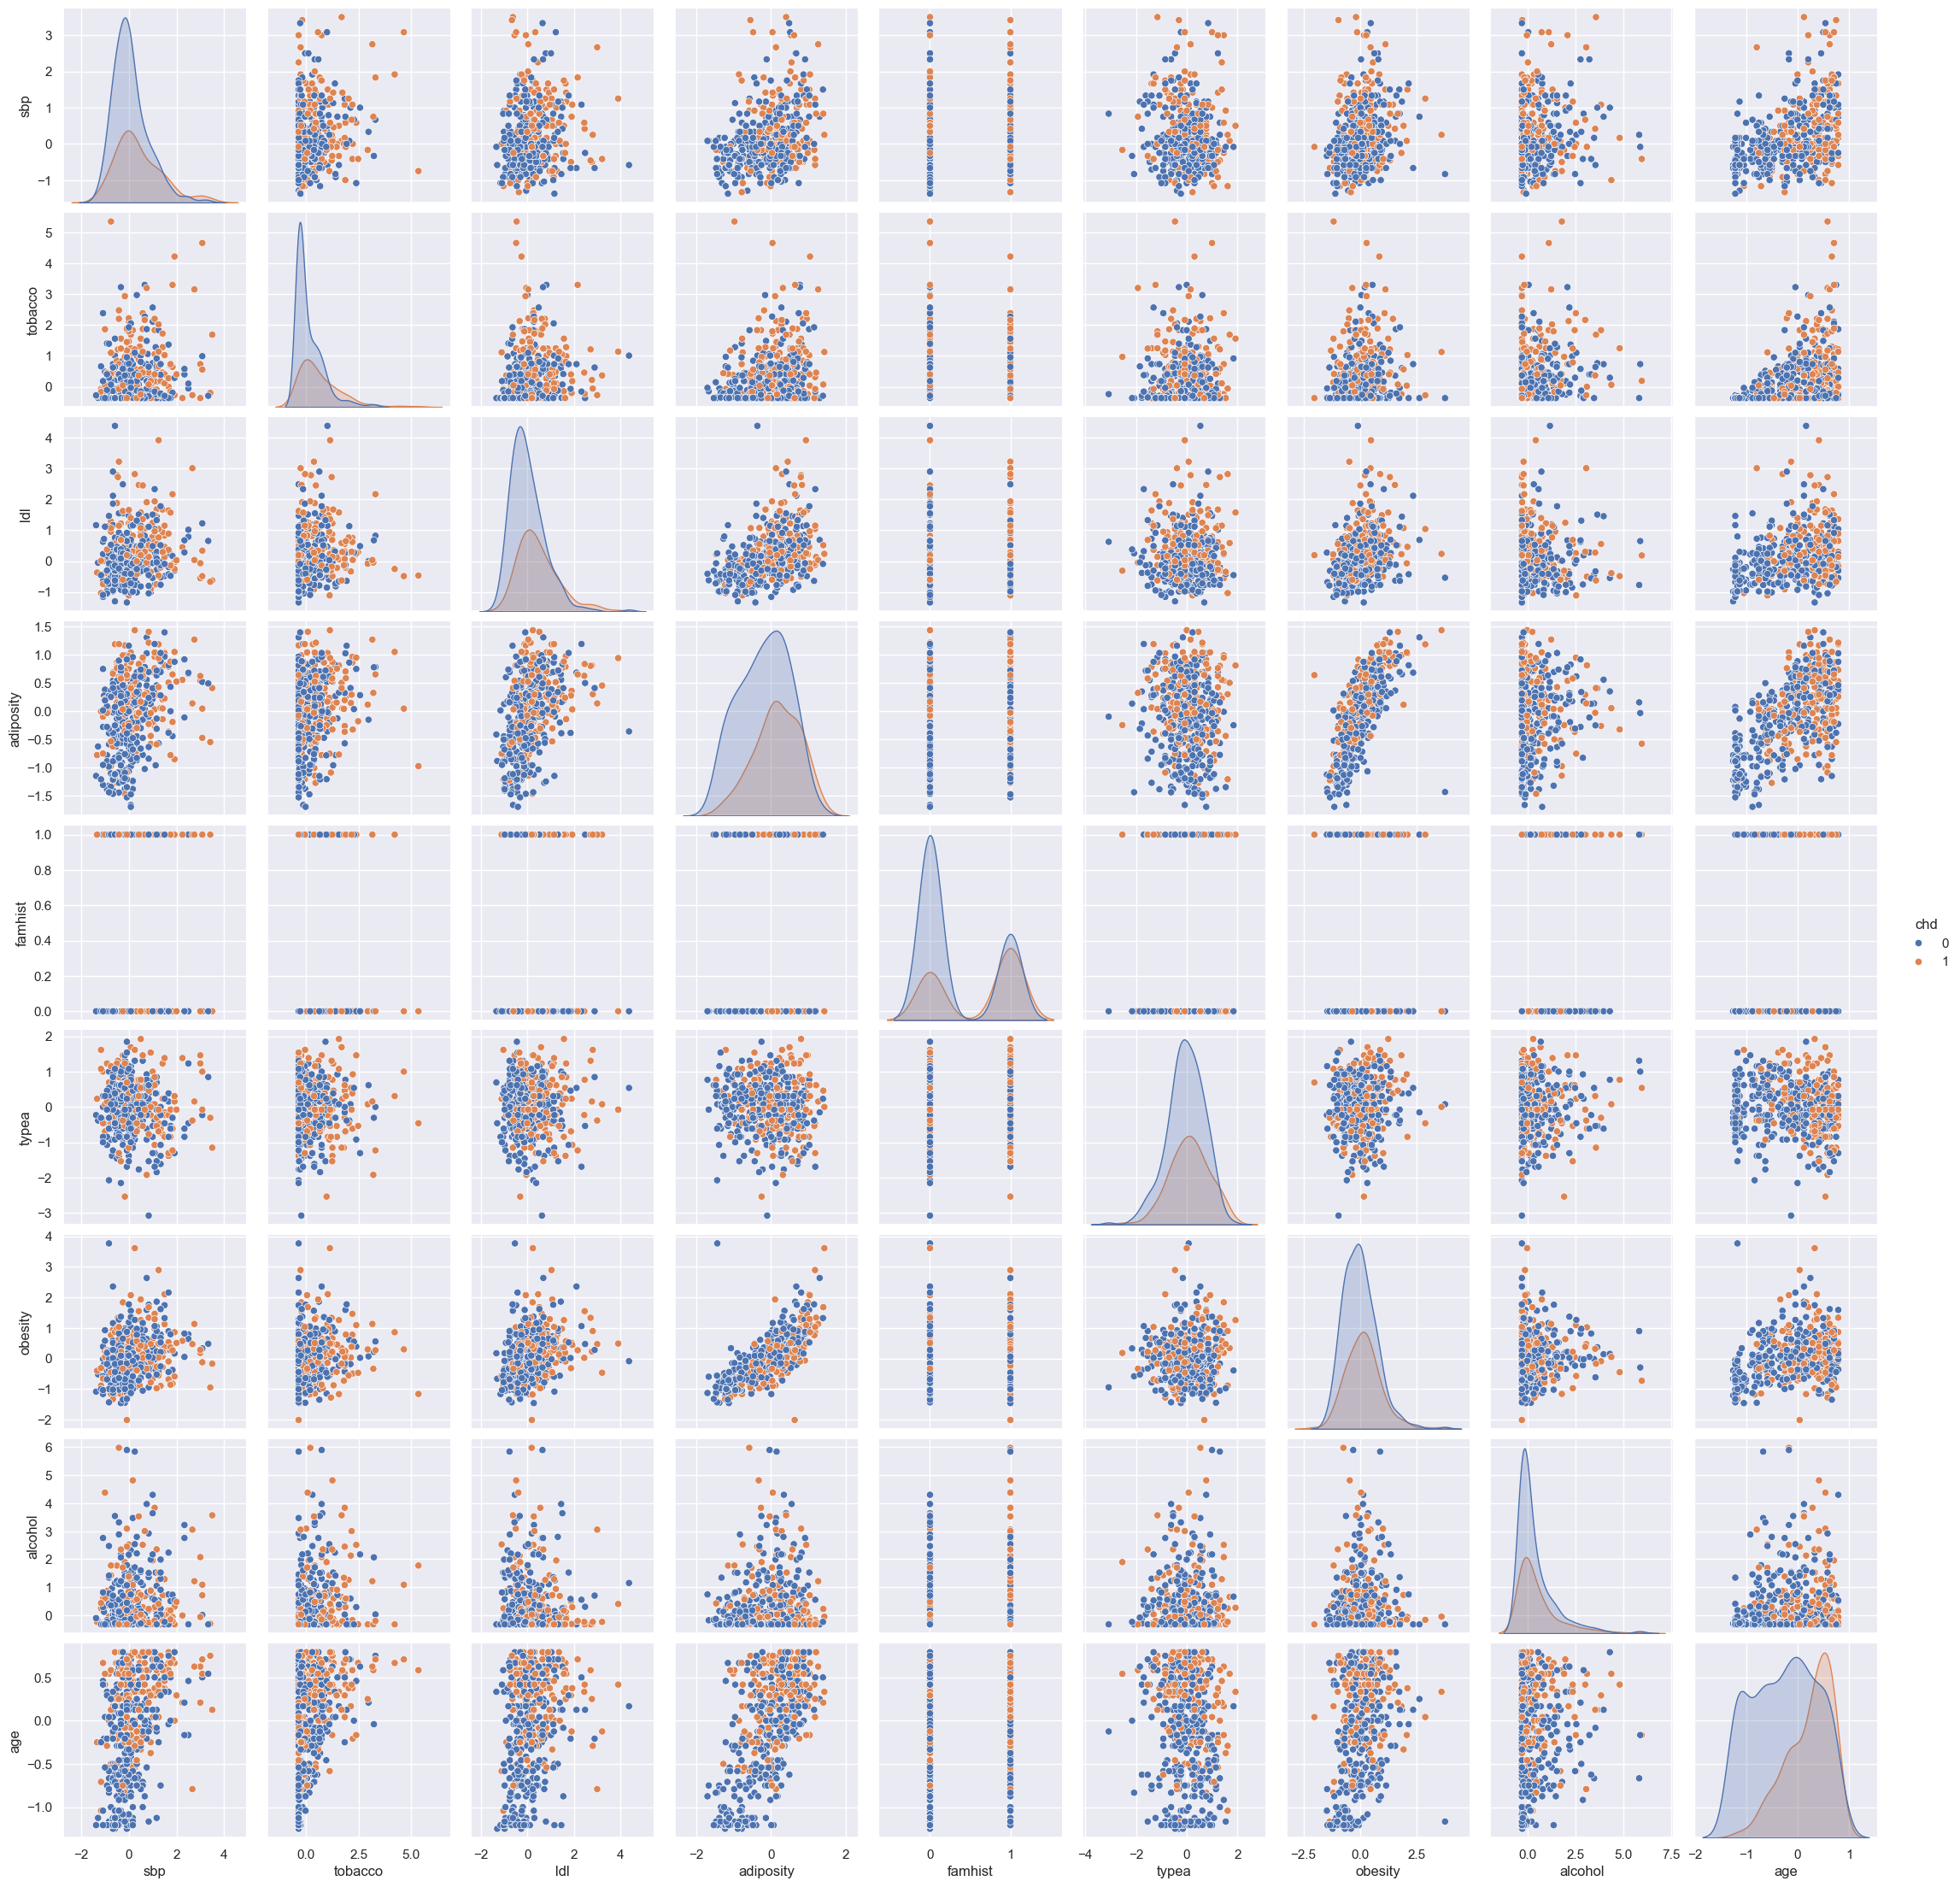

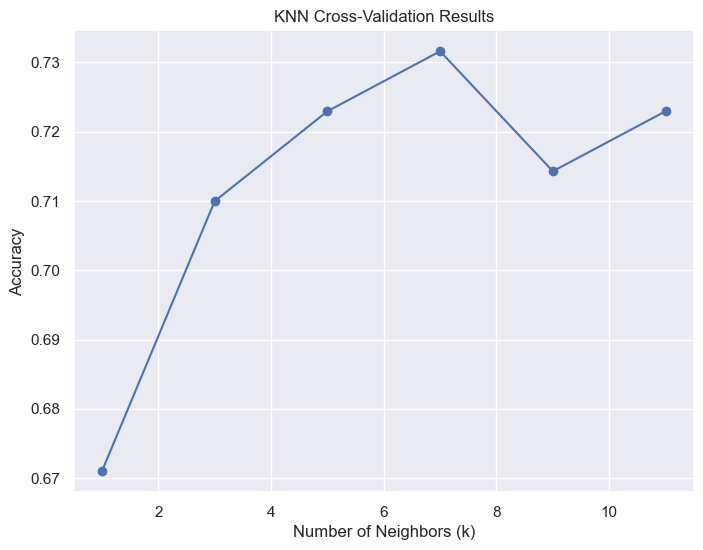

Optimized model accuracy: 0.7013
Classification Report for the optimized model:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       148
           1       0.64      0.39      0.48        83

    accuracy                           0.70       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.69      0.70      0.68       231

Optimized model F1 score: 0.4043
Optimized model ROC AUC: 0.6898


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# Set display option
pd.set_option('display.max_columns', None)

# Step 1: Data Preparation
y = df["chd"]
X = df.drop("chd", axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and test sets (50% training, 50% testing for demonstration)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=215)

# Step 2: Modeling & Prediction with KNN
# Set up KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline that standardizes, then runs the classifier
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', knn)])

# Step 3: Model Evaluation

# Setting up KNN parameters for cross-validation
knn_params = {'knn__n_neighbors': [1, 3, 5, 7, 9, 11]}

# Perform GridSearchCV with 10-fold cross-validation
grid = GridSearchCV(pipeline, knn_params, cv=7, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy):", grid.best_score_)

# Evaluating the best model on the test set
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Display classification report and AUC score
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))

#Step 4: Final Model
# Cross-validation results with the final model
cv_results = cross_validate(best_knn, X, y, cv= 10, scoring=["accuracy", "f1", "roc_auc"])

# Output the average scores from cross-validation
print("Cross-validation results:")
print(f"Average Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Average F1 Score: {cv_results['test_f1'].mean()}")
print(f"Average ROC AUC Score: {cv_results['test_roc_auc'].mean()}")

# Plot pair plot using seaborn
sns.pairplot(df, hue='chd', vars=X.columns)
plt.show()

# Plotting the results of the cross-validation for different K values
results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(8, 6))
plt.plot(results['param_knn__n_neighbors'], results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Cross-Validation Results')
plt.show()

# Step 5: Predict with the optimized model and evaluate
y_pred_optimized = best_knn.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized model accuracy: {optimized_accuracy:.4f}')

# Additional Evaluation Metrics and ROC Curve
print("Classification Report for the optimized model:")
print(classification_report(y_test, y_pred_optimized))

print(f"Optimized model F1 score: {cv_results['test_f1'].mean():.4f}")
print(f"Optimized model ROC AUC: {cv_results['test_roc_auc'].mean():.4f}")


In [35]:
# Save the model
knn_optimized_accuracy =  0.7013


3.2 CART ( Classification and Regression Test)

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        90
           1       0.42      0.47      0.44        49

    accuracy                           0.58       139
   macro avg       0.55      0.56      0.55       139
weighted avg       0.59      0.58      0.59       139

Accuracy: 0.5827338129496403
Fitting 5 folds for each of 180 candidates, totalling 900 fits


Optimized model accuracy: 0.8058
Classification Report for the optimized model:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        90
           1       0.89      0.51      0.65        49

    accuracy                           0.81       139
   macro avg       0.84      0.74      0.76       139
weighted avg       0.82      0.81      0.79       139

Optimized model F1 score: 0.6494
Optimized model Recall: 0.5102
Optimized model ROC AUC: 0.8821


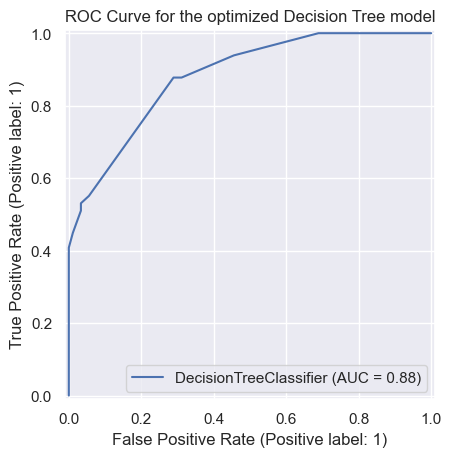

In [36]:
import warnings
warnings.simplefilter(action="ignore", category= Warning)

import joblib 
import pydotplus 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

# Set display options
pd.set_option("display.max_columns", None)

# Step 1: Data Preparation
X = df.drop('chd', axis=1)
y = df['chd']

# Step 2: Modeling & Prediction 
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Prediction Results
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Step 4: Model Validation with Cross validation
cart_model = DecisionTreeClassifier(random_state= 17).fit(X, y)
cv_results = cross_validate(cart_model, X, y, cv=10,  scoring= ["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

# Step 4 Model Validation with Hyperparameter Tuning with GridSearchCV 
cart_model.get_params() 
cart_params = {"max_depth": range(1, 11), 
               "min_samples_split": range(2, 20)} 
cart_best_grid = GridSearchCV(cart_model, cart_params, cv= 5, n_jobs= -1, verbose= True).fit(X, y) 
cart_best_grid.best_params_ 
cart_best_grid.best_score_ 

random = X.sample(1, random_state=45) 
random = X.sample(1, random_state=45) 

# Step 5: Final Model
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state= 17).fit(X, y)

cart_final.get_params()

cart_final.fit(X, y)

# Step 6: Predict with the optimized model and evaluate
y_pred_optimized = cart_final.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized model accuracy: {optimized_accuracy:.4f}')

# Additional Evaluation Metrics and ROC Curve
print("Classification Report for the optimized model:")
print(classification_report(y_test, y_pred_optimized))

print(f"Optimized model F1 score: {f1_score(y_test, y_pred_optimized):.4f}")
print(f"Optimized model Recall: {recall_score(y_test, y_pred_optimized):.4f}")

# Since Decision Tree does not directly provide probability estimates for AUC, we use predict_proba
roc_auc = roc_auc_score(y_test, cart_final.predict_proba(X_test)[:, 1])
print(f'Optimized model ROC AUC: {roc_auc:.4f}')
RocCurveDisplay.from_estimator(cart_final, X_test, y_test)
plt.title('ROC Curve for the optimized Decision Tree model') 
plt.show()


In [37]:
# Feature importance 
cart_final.feature_importances_

array([0.02067182, 0.11726451, 0.0777863 , 0.07241445, 0.10253419,
       0.12808553, 0.00865901, 0.04093351, 0.43165067])

In [38]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig('importances.png')

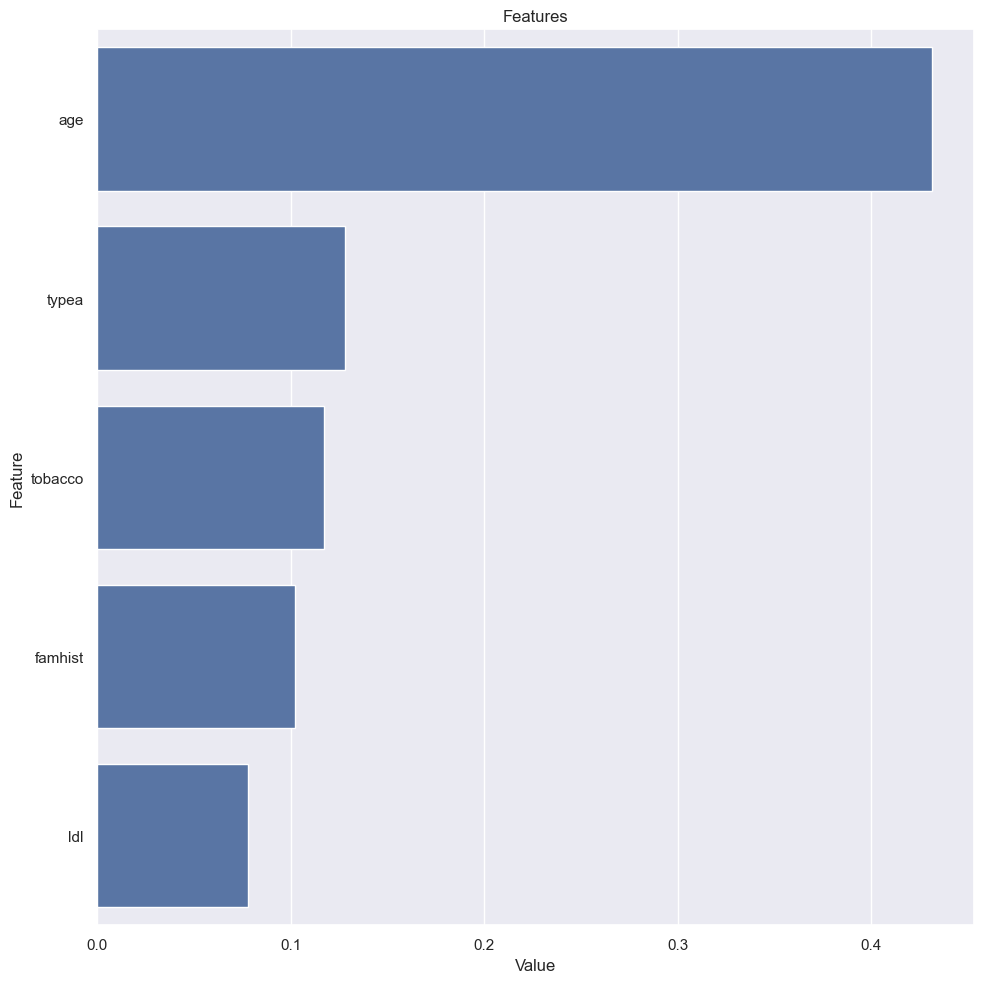

In [39]:
plot_importance(cart_final, X, num=5)

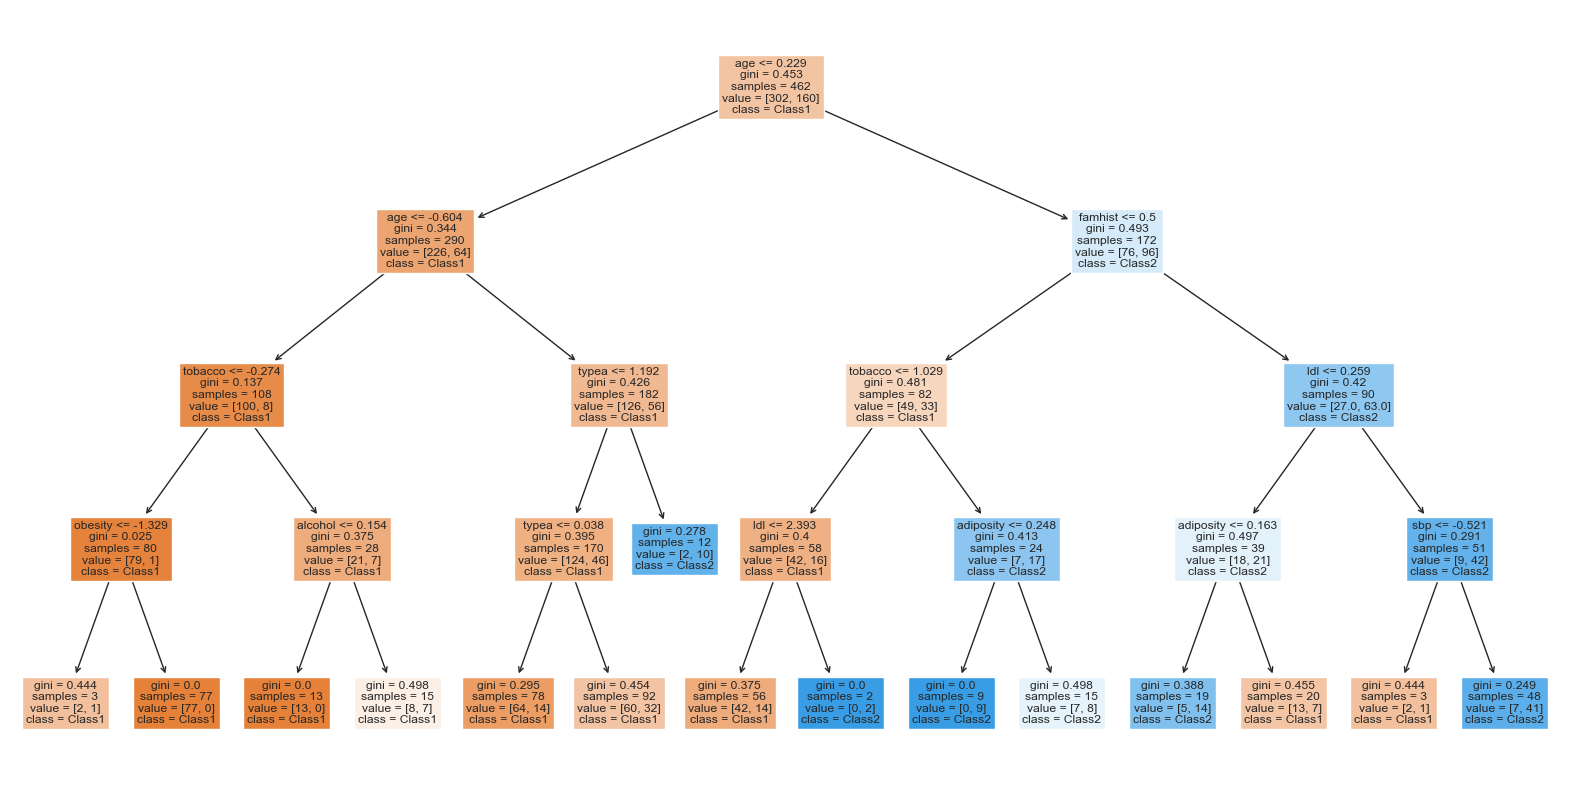

In [40]:
# Visualising the Decision Tree 
 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(cart_final, feature_names=X.columns, filled=True, class_names=['Class1', 'Class2'])
plt.show()

In [41]:
#Extracting Decision Rules 
from sklearn.tree import export_text

tree_rules = export_text(cart_final, feature_names=list(X.columns))

print(tree_rules)


|--- age <= 0.23
|   |--- age <= -0.60
|   |   |--- tobacco <= -0.27
|   |   |   |--- obesity <= -1.33
|   |   |   |   |--- class: 0
|   |   |   |--- obesity >  -1.33
|   |   |   |   |--- class: 0
|   |   |--- tobacco >  -0.27
|   |   |   |--- alcohol <= 0.15
|   |   |   |   |--- class: 0
|   |   |   |--- alcohol >  0.15
|   |   |   |   |--- class: 0
|   |--- age >  -0.60
|   |   |--- typea <= 1.19
|   |   |   |--- typea <= 0.04
|   |   |   |   |--- class: 0
|   |   |   |--- typea >  0.04
|   |   |   |   |--- class: 0
|   |   |--- typea >  1.19
|   |   |   |--- class: 1
|--- age >  0.23
|   |--- famhist <= 0.50
|   |   |--- tobacco <= 1.03
|   |   |   |--- ldl <= 2.39
|   |   |   |   |--- class: 0
|   |   |   |--- ldl >  2.39
|   |   |   |   |--- class: 1
|   |   |--- tobacco >  1.03
|   |   |   |--- adiposity <= 0.25
|   |   |   |   |--- class: 1
|   |   |   |--- adiposity >  0.25
|   |   |   |   |--- class: 1
|   |--- famhist >  0.50
|   |   |--- ldl <= 0.26
|   |   |   |--- adiposit

3.3 Random Forests 

*  A powerful ensemble method that can handle non-linear data well.

Initial model accuracy: 0.6978
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 5, 'max_features': 4, 'min_samples_split': 4, 'n_estimators': 50}
Optimized model accuracy: 0.7050
Classification Report for the optimized model:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        90
           1       0.62      0.41      0.49        49

    accuracy                           0.71       139
   macro avg       0.68      0.64      0.64       139
weighted avg       0.69      0.71      0.69       139

Optimized model F1 score: 0.4938
Optimized model Recall: 0.4082
Optimized model ROC AUC: 0.7426


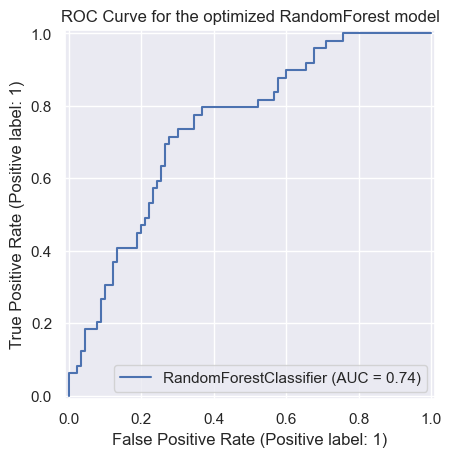

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, roc_auc_score, RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the data
y = df['chd']
X = df.drop(['chd'], axis=1)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 3: Initialize and fit the initial RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict on the test set and calculate the initial accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial model accuracy: {accuracy:.4f}')

# Step 5: Set up GridSearchCV for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'max_features': ['auto', 3, 4],  
    'min_samples_split': [2, 4, 6],
    'n_estimators': [50, 100, 200]
}
rf_cv_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
rf_cv_model.fit(X_train, y_train)

# Step 6: Display the best parameters and retrain the model
print("Best parameters:", rf_cv_model.best_params_)
rf_model = RandomForestClassifier(**rf_cv_model.best_params_, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict with the optimized model and evaluate
y_pred_optimized = rf_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized model accuracy: {optimized_accuracy:.4f}')

# Additional Evaluation Metrics and ROC Curve
print("Classification Report for the optimized model:")
print(classification_report(y_test, y_pred_optimized))

print(f"Optimized model F1 score: {f1_score(y_test, y_pred_optimized):.4f}")
print(f"Optimized model Recall: {recall_score(y_test, y_pred_optimized):.4f}")

# Since RandomForest does not directly provide probability estimates for AUC, we use predict_proba
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'Optimized model ROC AUC: {roc_auc:.4f}')
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve for the optimized RandomForest model')
plt.show()


In [43]:
print(f'Optimized model accuracy: {optimized_accuracy:.4f}')


Optimized model accuracy: 0.7050


Text(0.5, 0, 'Feature Importance')

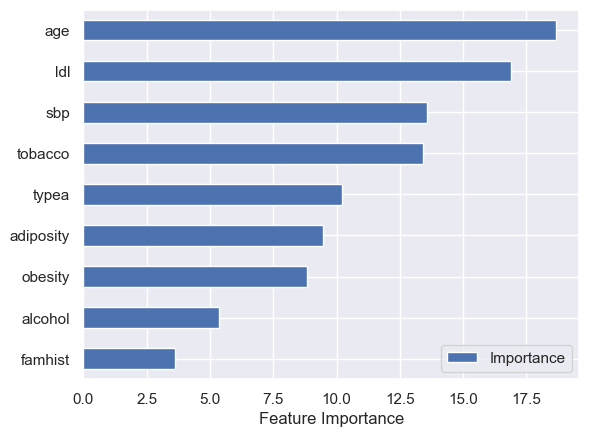

In [44]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                          index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending= True).plot(kind="barh", color = "b")
plt.xlabel("Feature Importance")

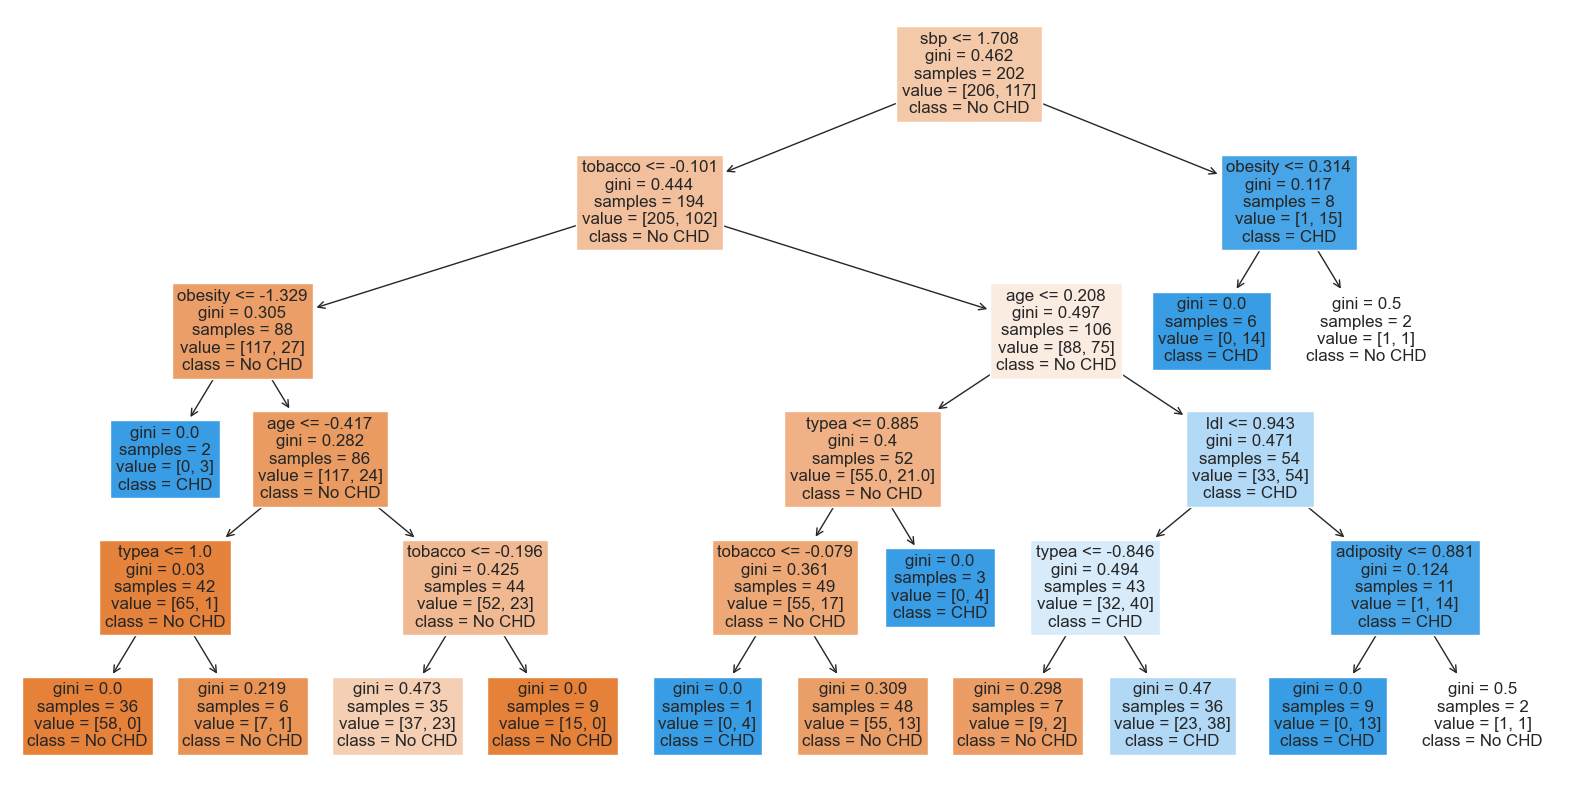

In [45]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Select a single tree from the Random Forest
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, filled=True, class_names=['No CHD', 'CHD'])
plt.show()


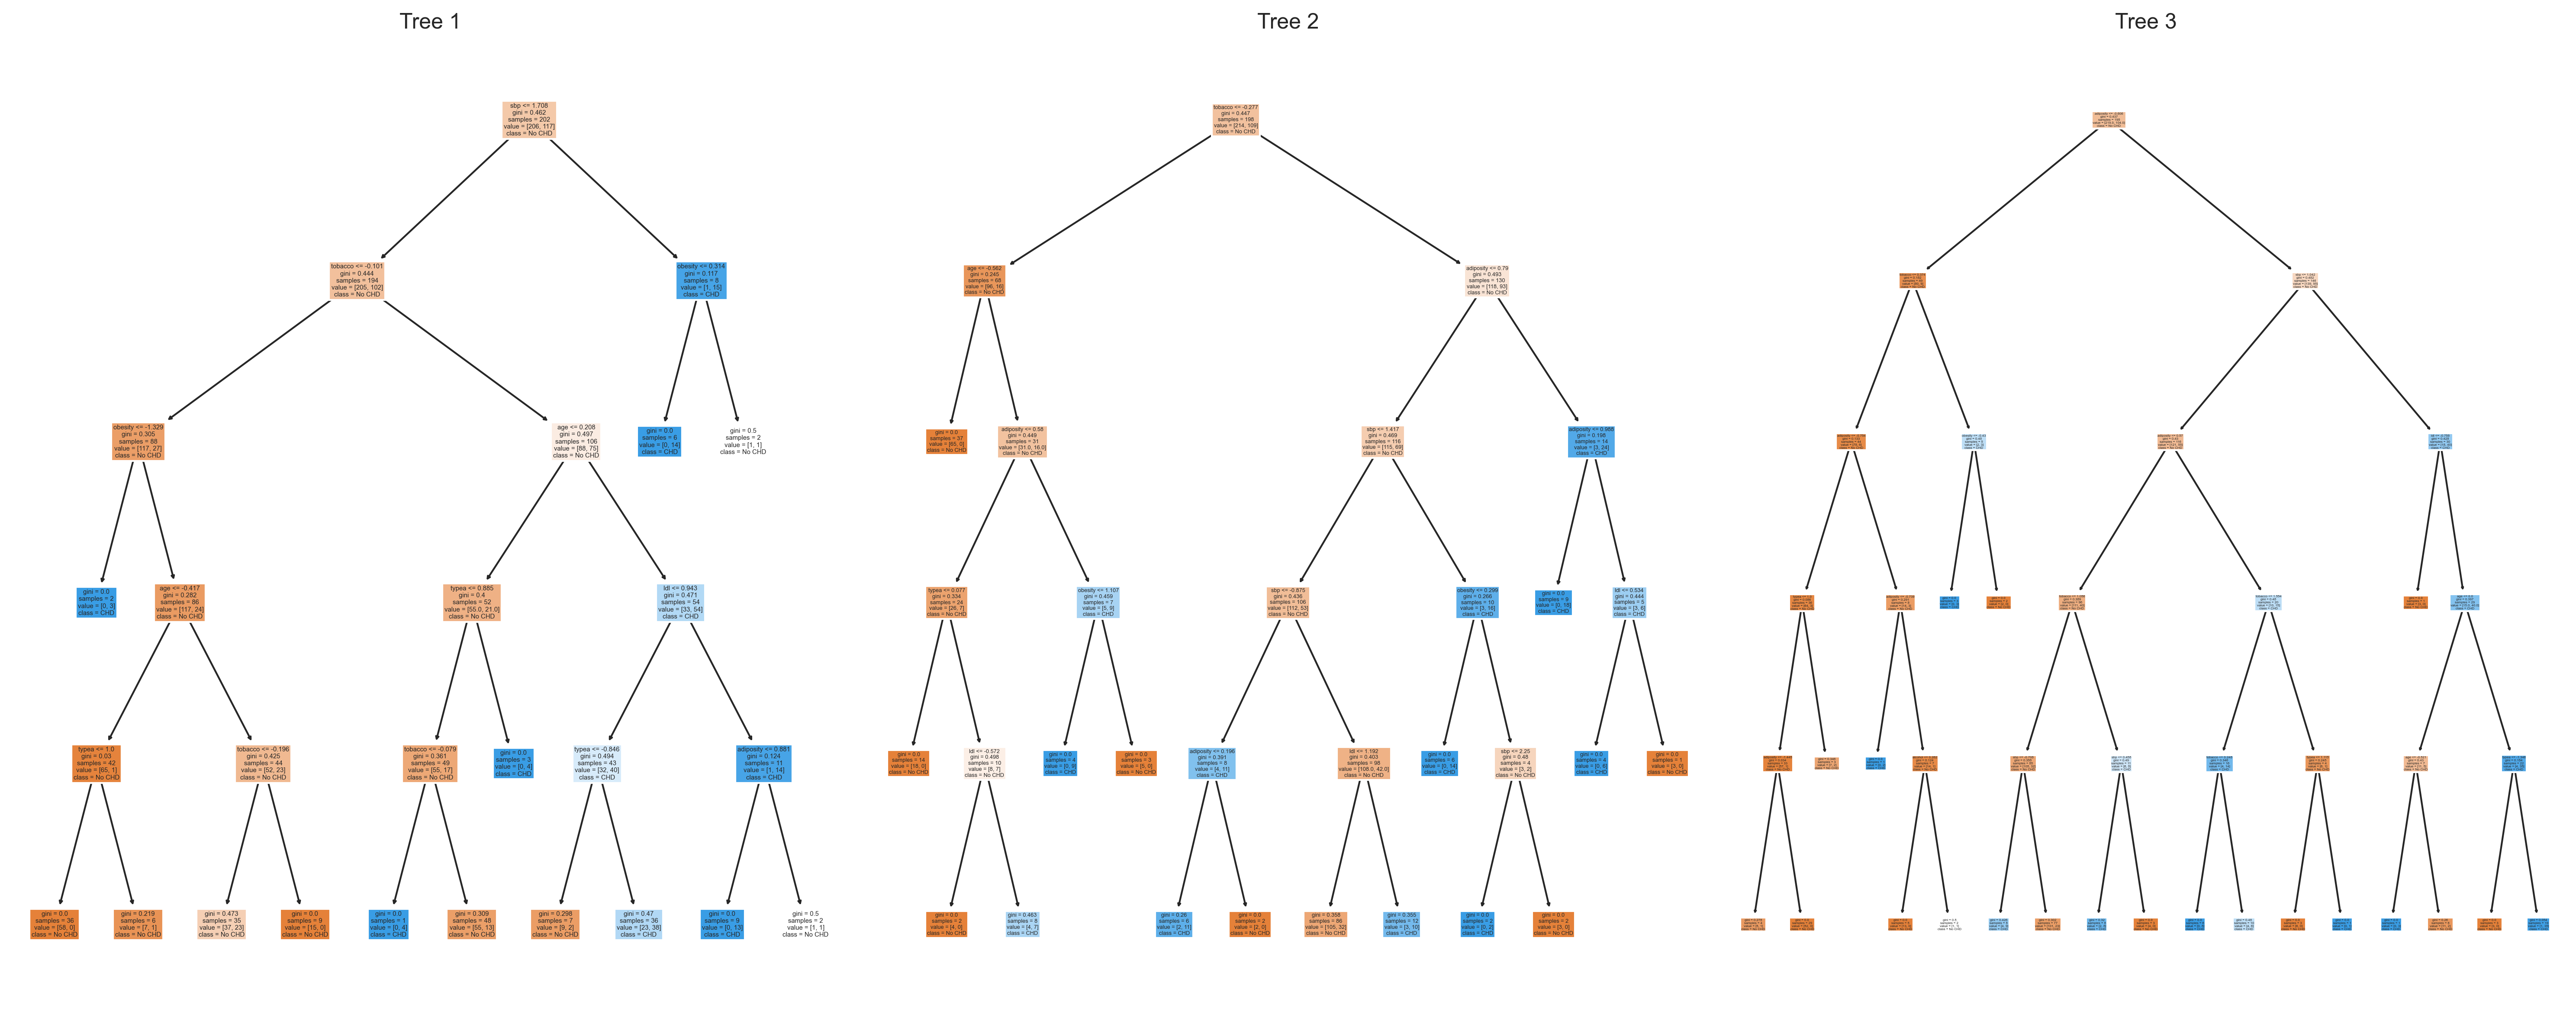

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Select three trees from the Random Forest model (for example, trees at indexes 0, 1, and 2)
trees = [rf_model.estimators_[i] for i in range(3)]

# Plot each of the three trees
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), dpi=300)

for i, tree in enumerate(trees):
    plot_tree(tree, feature_names=X.columns, filled=True, class_names=['No CHD', 'CHD'], ax=axes[i])
    axes[i].set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()


3.4 Naive Bayesian

* This algorithm will calculate the probability of heart disease given the presence of various features. It assumes independence between features, which may not be entirely accurate for this dataset but can still provide useful predictions.

In [47]:
# Step 1: Data Preparation 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop('chd', axis=1)
y = df['chd']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (usually, scaling is not needed for Naive Bayes, but we keep it for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
#Step 2: Model Building and Fitting (Naive Bayes)
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train_scaled, y_train)


GaussianNB()

In [49]:
#Step 3: Model Evaluation 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, log_loss

# Predict the labels for the test set
y_pred = nb_model.predict(X_test_scaled)

# Predict the probabilities for the test set (for ROC-AUC score)
y_pred_proba = nb_model.predict_proba(X_test_scaled)[:,1]  # Probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion matrix and detailed classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Calculating and displaying log loss
log_loss_value = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {log_loss_value:.4f}")


Accuracy: 0.70
Precision: 0.57
Recall: 0.61
F1 Score: 0.59
ROC-AUC Score: 0.74
Confusion Matrix:
[[67 23]
 [19 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        90
           1       0.57      0.61      0.59        49

    accuracy                           0.70       139
   macro avg       0.67      0.68      0.67       139
weighted avg       0.70      0.70      0.70       139

Log Loss: 0.9138


3.5 Support Vector Machines  

SVM can be used to find the hyperplane that best divides those with and without heart disease. Kernel functions can be applied to deal with non-linear boundaries if necessary.

Initial model accuracy (scaled): 0.7194
Fitting 10 folds for each of 9 candidates, totalling 90 fits


Best Parameters: {'C': 2}
Tuned and scaled model accuracy: 0.7194
Classification Report for the tuned and scaled model:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        90
           1       0.62      0.51      0.56        49

    accuracy                           0.72       139
   macro avg       0.69      0.67      0.68       139
weighted avg       0.71      0.72      0.71       139

Tuned and scaled model F1 score: 0.5618
Tuned and scaled model Recall: 0.5102
Tuned and scaled model ROC AUC: 0.7930


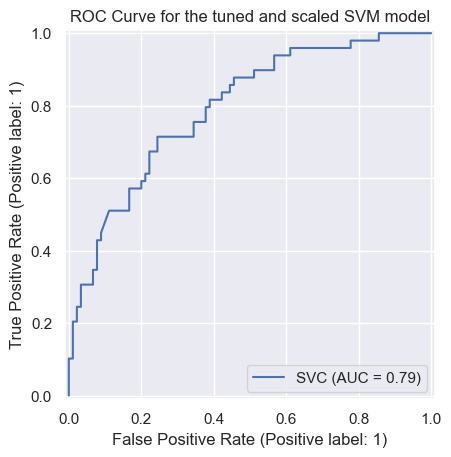

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

y = df['chd']
X = df.drop(['chd'], axis=1)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the SVM model with scaled data
svm_model = SVC(kernel='linear').fit(X_train_scaled, y_train)

# Making predictions and evaluating the initial model with scaled data
y_pred = svm_model.predict(X_test_scaled)
print(f"Initial model accuracy (scaled): {accuracy_score(y_test, y_pred):.4f}")

# Model Tuning with GridSearchCV
svc_params = {'C': np.arange(1, 10)}
svc = SVC(kernel="linear")

svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose=2)
svc_cv_model.fit(X_train_scaled, y_train)
print("Best Parameters:", svc_cv_model.best_params_)

# Training and evaluating the tuned model with scaled data
svc_tuned_scaled = SVC(kernel="linear", C=svc_cv_model.best_params_['C'], probability=True).fit(X_train_scaled, y_train)  
y_pred_tuned_scaled = svc_tuned_scaled.predict(X_test_scaled)
print(f"Tuned and scaled model accuracy: {accuracy_score(y_test, y_pred_tuned_scaled):.4f}")

# Evaluation metrics for the tuned and scaled model
print("Classification Report for the tuned and scaled model:")
print(classification_report(y_test, y_pred_tuned_scaled))

# F1 score and recall
print(f"Tuned and scaled model F1 score: {f1_score(y_test, y_pred_tuned_scaled):.4f}")
print(f"Tuned and scaled model Recall: {recall_score(y_test, y_pred_tuned_scaled):.4f}")

# ROC AUC score and curve
print(f"Tuned and scaled model ROC AUC: {roc_auc_score(y_test, svc_tuned_scaled.predict_proba(X_test_scaled)[:, 1]):.4f}")
RocCurveDisplay.from_estimator(svc_tuned_scaled, X_test_scaled, y_test)
plt.title('ROC Curve for the tuned and scaled SVM model')
plt.show()


3.6 Gradient Boosting Machines 


Gradient Boosting Machine is a generalized version of AdaBoost that can easily be adapted to both classification and regression problems. It relies on the idea of assembling weak learners to produce a strong learner. Models are built as a series of predictive models upon data. These models, in the form of a single predictive model, aim to correct the errors of the previous model, thus enhancing the performance of subsequent models. Gradient Boosting Machine achieves this by optimizing a loss function and adding a new model at each step to minimize the gradient of this function. In this way, it can be applied to classification and regression problems with a generalized approach.


In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Separate the features and target variable
y = df["chd"]
X = df.drop(['chd'], axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and fit the Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial model accuracy: {accuracy:.4f}")

# Parameters for tuning
gbm_params = {
    "learning_rate": [0.001, 0.01, 0.1, 0.05],
    "n_estimators": [100, 500],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10]
}

# Initialize GradientBoostingClassifier for tuning
gbm = GradientBoostingClassifier()

# Set up GridSearchCV
gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)
gbm_cv.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", gbm_cv.best_params_)

gbm = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3 , min_samples_split = 5, n_estimators = 100 )
gbm_tuned = gbm.fit(X_train, y_train)

# Initialize GradientBoostingClassifier with the best parameters
gbm_tuned = GradientBoostingClassifier(**gbm_cv.best_params_).fit(X_train, y_train)

# Predict on the test set with the tuned model
y_pred_tuned = gbm_tuned.predict(X_test)

# Calculate and print the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned model accuracy: {accuracy_tuned:.4f}")


Initial model accuracy: 0.7050
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Tuned model accuracy: 0.7266


Classification Report for the tuned model:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        90
           1       0.63      0.55      0.59        49

    accuracy                           0.73       139
   macro avg       0.70      0.69      0.69       139
weighted avg       0.72      0.73      0.72       139

Tuned model F1 score: 0.5870
Tuned model Recall: 0.5510
Tuned model ROC AUC: 0.7639


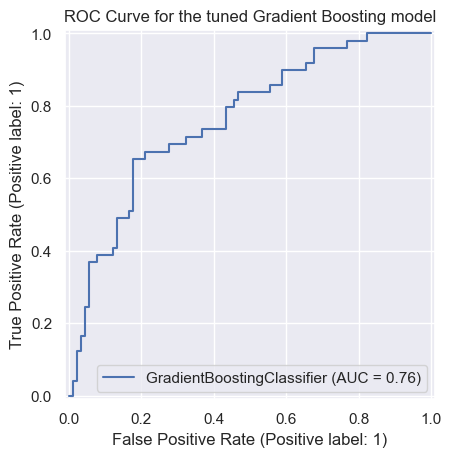

In [52]:
from sklearn.metrics import classification_report, f1_score, recall_score, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report for the tuned model
print("Classification Report for the tuned model:")
print(classification_report(y_test, y_pred_tuned))

# Calculate and print F1 score, accuracy, and recall for the tuned model
f1 = f1_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
print(f"Tuned model F1 score: {f1:.4f}")
print(f"Tuned model Recall: {recall:.4f}")

# Compute ROC AUC score and plot the ROC curve for the tuned model
roc_auc = roc_auc_score(y_test, gbm_tuned.predict_proba(X_test)[:, 1])
print(f"Tuned model ROC AUC: {roc_auc:.4f}")
RocCurveDisplay.from_estimator(gbm_tuned, X_test, y_test)
plt.title('ROC Curve for the tuned Gradient Boosting model')
plt.show()


**The final chosen classifier based on the accuracy level :** Decision Tree with CART emerged as the leading model, achieving the highest accuracy at 80.57%